In [1]:
import tensorflow as tf
from tensorboard.backend.event_processing.event_file_loader import EventFileLoader
from tensorboard.plugins.scalar import metadata
import matplotlib.pyplot as plt

import plotly.express as px
import pandas as pd

def read_tensorboard_log(log_dir):
    event_file = tf.compat.v1.train.summary_iterator(log_dir)
    data = {}
    for event in event_file:
        if event.HasField('summary'):
            for value in event.summary.value:
                if value.tag not in data:
                    data[value.tag] = [[],[]]
                # print(value)
                data[value.tag][0].append(event.step)
                data[value.tag][1].append(tf.make_ndarray(value.tensor))

    return data



2023-07-01 14:27:25.983832: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-01 14:27:26.006567: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-01 14:27:26.300351: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Value_Loss


Utility


Fairness


Min_Utility


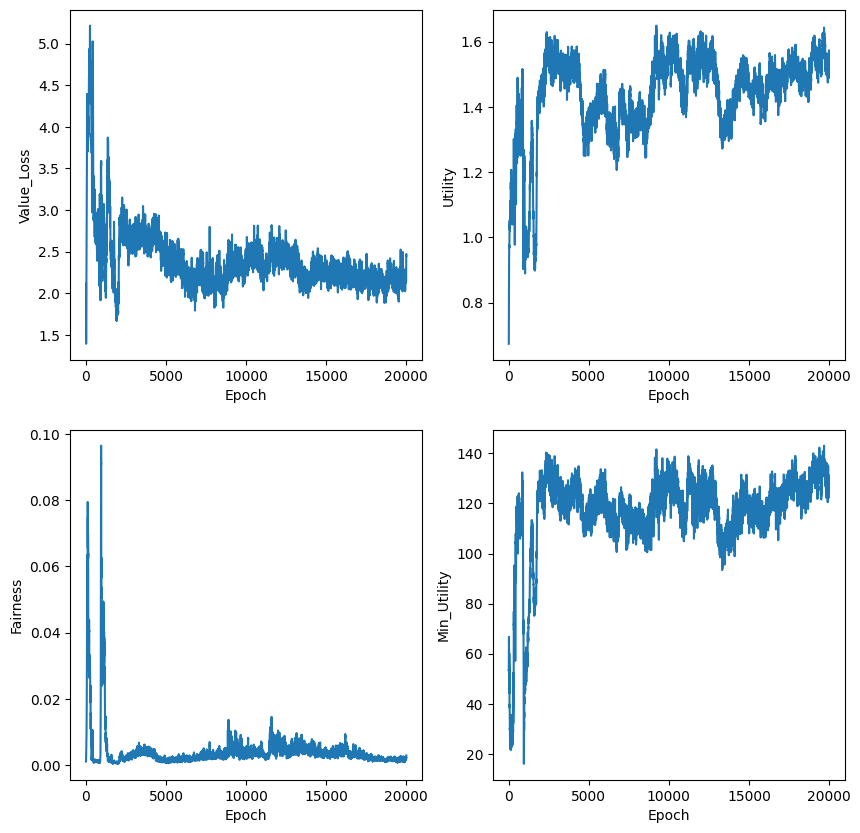

In [144]:
logdir = 'logs/metrics/events.out.tfevents.1686942566.yoda.1326185.0.v2'
logdir = 'logs/metrics2/events.out.tfevents.1686972630.yoda.1509697.0.v2'
logdir = 'logs/metrics_DQN/events.out.tfevents.1687382162.yoda.3496151.0.v2'
logdir = 'logs/metrics_DQN_Reallocate/events.out.tfevents.1687466688.yoda.2016143.0.v2'
logdir = 'logs/metrics_DQN_Reallocate/events.out.tfevents.1687467357.yoda.2052725.0.v2'
# logdir = 'logs/OnPolicyVF/Reallocate/1688242381/events.out.tfevents.1688242381.yoda.1772009.0.v2'
# logdir = 'logs/OnPolicyVF/Reallocate/1688243545/events.out.tfevents.1688243545.yoda.2385136.0.v2'
# logdir = 'logs/OnPolicyVF/Fixed/1688242685/events.out.tfevents.1688242685.yoda.1893820.0.v2'
# logdir = 'logs/OnPolicyVF/Fixed/1688242883/events.out.tfevents.1688242883.yoda.1994729.0.v2'

logdir = 'logs/OnPolicyVF/Reallocate/1688251313/events.out.tfevents.1688251313.yoda.112156.0.v2'
# logdir = 'logs/OnPolicyVF/Fixed/1688251340/events.out.tfevents.1688251340.yoda.115522.0.v2'

logdir = 'logs/OnPolicyVF/Reallocate/1688280275/events.out.tfevents.1688280275.yoda.2012679.0.v2' #LR decay, 50 timestep updates
logdir = 'logs/OnPolicyVF/Fixed/1688279601/events.out.tfevents.1688279601.yoda.1760453.0.v2' #LR decay, 50 timestep updates

logdir = 'logs/OnPolicyVF/Fixed/1688318986/events.out.tfevents.1688318986.yoda.3989492.0.v2' #Larger batch size (256), 50 timestep updates
#Starts high, them starts going down
logdir = 'logs/OnPolicyVF/Fixed/1688319628/events.out.tfevents.1688319628.yoda.92262.0.v2' #Above, + larger feature space (other agents)
#not bad
logdir = 'logs/OnPolicyVF/Fixed/1688323202/events.out.tfevents.1688323202.yoda.1873183.0.v2' #Above, With epsilon decay (0.9, 0.99, 0.1)
#Lower peak, but may be due to noise
# logdir = 'logs/OnPolicyVF/Fixed/1688364966/events.out.tfevents.1688364966.yoda.3010534.0.v2' #Above, with lr 0.0001, 
# logdir = 'logs/OnPolicyVF/Fixed/1688365147/events.out.tfevents.1688365147.yoda.3098758.0.v2' #Same as above, removed lr update in VF
logdir = 'logs/OnPolicyVF/Reallocate/1688403328/events.out.tfevents.1688403328.yoda.3991888.0.v2' #Above above above, lr 0.00003 with Adam decay, Reallocate 

data = read_tensorboard_log(logdir)

keys = ['Policy_Loss', 'Value_Loss', 'Utility', 'Fairness']
keys = [ 'Value_Loss', 'Utility', 'Fairness', 'Min_Utility']
# keys = ['Utility', 'Fairness']

#Plot subfigures
fig = plt.figure(figsize=(10, 10))
for i, key in enumerate(keys):
    x = data[key][0]
    y = data[key][1]
    # print(key, x, y)
    #plot a smoothed curve
    y_smooth = pd.DataFrame(y).rolling(10).mean()
    # y_smooth = y
    df = pd.DataFrame({'Epoch': x, key: y_smooth[0]})
    plt.subplot(2, 2, i+1)
    plt.xlabel('Epoch')
    plt.ylabel(key)
    plt.plot(x, y_smooth)
# plt.show()

#plot 2x2 subfigures using plotly
for i, key in enumerate(keys):
    x = data[key][0]
    y = data[key][1]
    # print(key, x, y)
    print(key)
    #plot a smoothed curve
    y_smooth = pd.DataFrame(y).rolling(1).mean()
    # y_smooth = y
    #change the size of the figure
    px.defaults.width = 800
    df = pd.DataFrame({'Epoch': x, key: y_smooth[0]})
    fig = px.line(df, x='Epoch', y=key, title=key)
    fig.show()


In [31]:
import os
os.listdir('logs/OnPolicyVF/Reallocate/')

['1688243213',
 '1688243480',
 '1688243502',
 '1688243545',
 '1688243448',
 '1688242381']